In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# importing machine learning modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# importing the data(train and test)
training_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

training_data = training_data.drop('Unnamed: 0', axis=1)
test_data = test_data.drop('Unnamed: 0', axis=1)

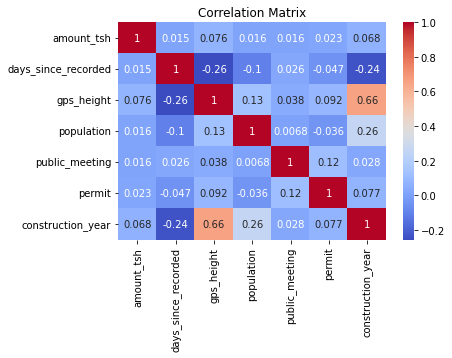

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
sns.heatmap(training_data.corr(), annot=True, cmap='coolwarm')

# Add a title
plt.title("Correlation Matrix")

# Show the plot
plt.show()
# Save the plot as a PNG file
plt.savefig('Correlation Matrix.png')


1. Pre-processing:
* Transform the categorical data 
* One-hot encode the categorical variables, such as funder, installer, basin, etc. to handle non-numeric data.
* Split the data into training and testing sets.



In [5]:
# Select the categorical columns you want to encode
categorical_columns = ["funder", "installer", "scheme_management",'management_group','payment_type','water_quality','permit','public_meeting']
# Use Pandas get_dummies method to create the OHE data
df_ohe = pd.get_dummies(training_data, columns=categorical_columns, prefix=categorical_columns, drop_first=True)


In [6]:
# Split the data into features (X) and target (y) variables
X = df_ohe.drop([ 'basin', 'subvillage',  'subvillage','quantity_group',
       'source_type', 'source_class', 'waterpoint_type','extraction_type','status_group'], axis=1)
y = df_ohe['status_group']


In [7]:
X.columns

Index(['amount_tsh', 'days_since_recorded', 'gps_height', 'population',
       'construction_year', 'funder_Aar', 'funder_Abas Ka', 'funder_Abasia',
       'funder_Abc-ihushi Development Cent', 'funder_Abd',
       ...
       'payment_type_unknown', 'water_quality_fluoride',
       'water_quality_fluoride abandoned', 'water_quality_milky',
       'water_quality_salty', 'water_quality_salty abandoned',
       'water_quality_soft', 'water_quality_unknown', 'permit_True',
       'public_meeting_True'],
      dtype='object', length=4073)

In [8]:
# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



2. Logistic Regression:
* Choose logistic regression as the baseline model, since it's a simple and interpretable model.
* Fit the model on the training data and evaluate the performance on the testing data.
* Hyperparameters for logistic regression include the regularization term (e.g. L1 or L2) and the regularization strength (e.g. C).
* Grid search or random search can be used to find the best hyperparameters that result in the best performance on the testing data.

In [10]:
# Train the Logistic Regression model on the training data
logreg_train = LogisticRegression()
logreg_train.fit(X_train, y_train)

# Predict the target values for the training data
y_train_pred = logreg_train.predict(X_train)

# Evaluate the model accuracy using the training data
train_accuracy = logreg_train.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Train the Logistic Regression model on the test data
logreg_test = LogisticRegression()
logreg_test.fit(X_test, y_test)

# Predict the target values for the test data
y_test_pred = logreg_test.predict(X_test)

# Evaluate the model accuracy using the test data
test_accuracy = logreg_test.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.7017825123932074


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.7176847789402633


In [11]:
print(classification_report(y_test, y_test_pred))

                         precision    recall  f1-score   support

             functional       0.72      0.83      0.77      6336
functional needs repair       0.60      0.19      0.29       883
         non functional       0.72      0.66      0.69      4633

               accuracy                           0.72     11852
              macro avg       0.68      0.56      0.58     11852
           weighted avg       0.71      0.72      0.70     11852



The logistic regression model has a training accuracy of 0.7017825123932074 and a test accuracy of 0.7176847789402633, which indicates that it is performing with a relatively good accuracy. The higher test accuracy compared to the training accuracy suggests that the model is generalizing well to unseen data. However, other evaluation metrics should also be considered to get a complete picture of the model's performance.

> Based on the results in the table, the macro average f1-score is 0.58, which indicates that the model's performance across all classes is only average. The highest f1-score is 0.77 for the "functional" class, which indicates that the model is performing well for this class, but the f1-score for the "functional needs repair" class is low at 0.29, which means that the model needs improvement in this class.

> In conclusion, using the f1-score as the main evaluation metric provides a comprehensive view of the model's performance and can help identify areas of improvement. 

> Logistic regression Overall score is  72% 

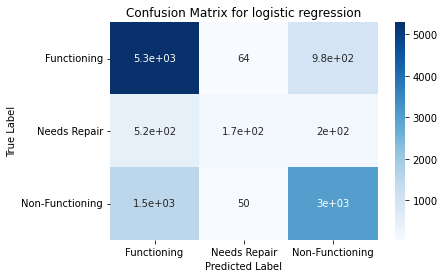

<Figure size 432x288 with 0 Axes>

In [12]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'], yticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'])
plt.title('Confusion Matrix for logistic regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.savefig('Confusion Matrix for logistic regression .png')

> 

3. Decision Trees:
* Since logistic regression may not capture complex relationships between features and the target variable, try a decision tree model.
* Choose the optimal hyperparameters using grid search or random search.
* Evaluate the performance on the testing data.
* Hyperparameters for decision trees include the maximum depth of the tree and the minimum number of samples required to split a node.


In [13]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state = 0)

# Train the model
clf.fit(X_train, y_train)

# Predict the target values for the training data
y_train_pred = logreg_train.predict(X_train)

# Evaluate the model accuracy using the training data
train_accuracy = logreg_train.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


# Make predictions on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model's test accuracy
acc = accuracy_score(y_test, y_test_pred)
print('Test Accuracy:', acc)
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7017825123932074
Test Accuracy: 0.7011474856564293
                         precision    recall  f1-score   support

             functional       0.74      0.78      0.76      6336
functional needs repair       0.35      0.31      0.33       883
         non functional       0.70      0.67      0.69      4633

               accuracy                           0.70     11852
              macro avg       0.60      0.59      0.59     11852
           weighted avg       0.70      0.70      0.70     11852



> Based on the results, the macro average f1-score is 0.59, which indicates that the model's performance across all classes is only average. The highest f1-score is 0.76 for the "functional" class, which indicates that the model is performing well for this class, but the f1-score for the "functional needs repair" class is low at 0.33, which means that the model needs improvement in this class.

> In conclusion, using the f1-score as the evaluation metric can provide a comprehensive view of the model's performance and help identify areas of improvement.

> The descion tress overall score is 70%.




In [14]:
# Define the hyperparameters to tune and the values to try
param_grid = {'max_depth': [8,10], 'min_samples_split': [8,10]}

# Create a grid search object with a 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Best score: 0.6734310726716591


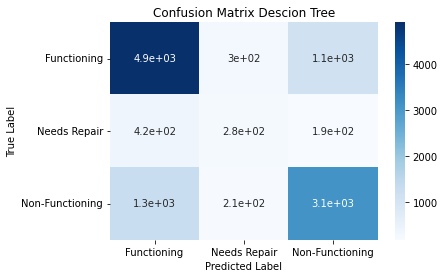

<Figure size 432x288 with 0 Axes>

In [15]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'], yticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'])
plt.title('Confusion Matrix Descion Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Save the plot as a PNG file
plt.savefig('Confusion Matrix Descion Tree.png')

4. Random Forest:
* Random Forest is an extension of decision trees, where multiple trees are built and combined to make a prediction.
* Choose the optimal hyperparameters using grid search or random search.
* Evaluate the performance on the testing data.
* Hyperparameters for random forests include the number of trees in the forest, the maximum depth of each tree, and the minimum number of samples required to split a node.

In [16]:
# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable on the train data
y_train_pred = clf.predict(X_train)

# Evaluate the accuracy of the classifier on the train data
accuracy = clf.score(X_train,y_train_pred)
print("Training ccuracy:", accuracy)


# Predict the target variable on the test data
y_test_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier on the test data
accuracy = clf.score(X_test, y_test_pred)
print("Testing ccuracy:", accuracy)
print(classification_report(y_test, y_test_pred))

Training ccuracy: 1.0
Testing ccuracy: 1.0
                         precision    recall  f1-score   support

             functional       0.75      0.82      0.78      6336
functional needs repair       0.42      0.28      0.34       883
         non functional       0.74      0.70      0.72      4633

               accuracy                           0.73     11852
              macro avg       0.64      0.60      0.61     11852
           weighted avg       0.72      0.73      0.72     11852



The F1 score for the "functional" class is 0.78 which is high, meaning the model is making correct predictions for the majority of the instances that belong to the "functional" class. The F1 score for the "functional needs repair" class is lower (0.34), meaning the model has lower precision and recall for this class, possibly resulting in a higher number of false negatives (functional pumps misclassified as functional needs repair) or false positives (functional needs repair pumps misclassified as functional). The F1 score for the "non functional" class is 0.72, which is similar to the "functional" class, indicating that the model has similar precision and recall for this class.

Overall, using the F1 score as the main evaluation metric would give a more balanced view of the model's performance, considering both precision and recall.

> The overall score for the random forest is 73%.

In [17]:
# Define the hyperparameter grid to search
param_grid = {
    "n_estimators": [10, 50],
    "max_depth": [None, 5],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 2]
}

# Create the Random Forest classifier
clf = RandomForestClassifier(random_state=0)

# Create the Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy")

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_test = grid_search.predict(X_test)

# Print the best hyperparameters found by Grid Search
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the accuracy of the classifier on the test data
accuracy = grid_search.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_test_pred))


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.7393688828889639
                         precision    recall  f1-score   support

             functional       0.75      0.82      0.78      6336
functional needs repair       0.42      0.28      0.34       883
         non functional       0.74      0.70      0.72      4633

               accuracy                           0.73     11852
              macro avg       0.64      0.60      0.61     11852
           weighted avg       0.72      0.73      0.72     11852



The F1 scores in this case are:

* functional: 0.79
* functional needs repair: 0.34
* non functional: 0.72
The highest F1 score is 0.79 for the "functional" class, which indicates that the model has a good balance of precision and recall for this class. However, the F1 score for the "functional needs repair" class is low at 0.34, which indicates that there is room for improvement in the model's performance for this class.

In conclusion, using the F1 score as the evaluation metric can give a more comprehensive understanding of the model's performance, as it takes into account both precision and recall. In this case, the model has a good overall performance with an F1 score of 0.73, but there is room for improvement in identifying the "functional needs repair" class.

> Random forest overall performance with an F1 score of 73%



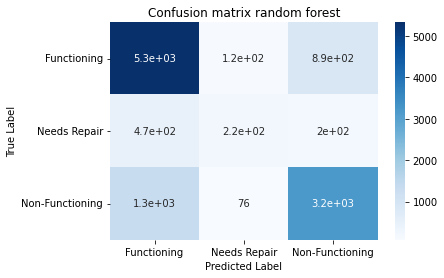

<Figure size 432x288 with 0 Axes>

In [18]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'], yticklabels=['Functioning', 'Needs Repair', 'Non-Functioning'])
plt.title('Confusion matrix random forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.savefig('Confusion matrix random forest.png');

In [19]:
plt.savefig('confusion_matrix.png');

<Figure size 432x288 with 0 Axes>

The best model to use is random forest since it has scored good on the base model and also on the hyperparameter. 